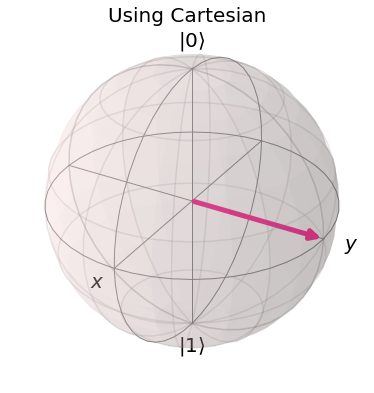

In [2]:
# Which plots the bloch sphere of specified spherical coordinates? Ans: plot_bloch_vector

from qiskit.visualization import plot_bloch_vector 
import numpy as np 

plot_bloch_vector([0,1,0], title='Using Cartesian')

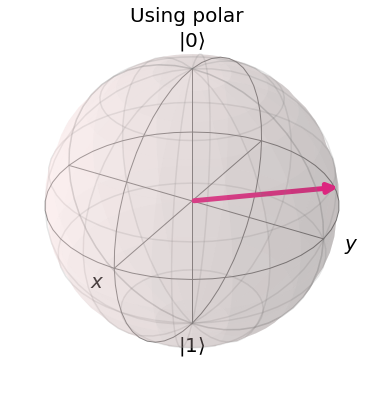

In [242]:
plot_bloch_vector([1, np.pi/2, np.pi/3], title='Using polar') # r, theta, phi

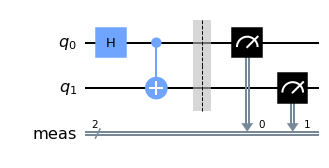

In [11]:
# How can a circuit ‘bell0’ that sets up a maximally entangled state and measures it be created using the below circuits?
# Ans: meas.compose(qc,front=True)

from qiskit import *

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
meas = QuantumCircuit(2)
meas.measure_all()
#Insert code here

bell0 = meas.compose(qc,front=True)
bell0.draw()

In [13]:
# Which of these retrieves the qiskit version?
# Ans: qiskit.__version__
import qiskit 
qiskit.__version__

'0.22.2'

In [19]:
# For quantum circuit qc and backend sim, which of the following gives the status of the job?
# Ans: job_monitor(job)
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.visualization import plot_histogram
provider = IBMQ.load_account()
lima = provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2022-12-18 17:32:27,987: Credentials are already in use. The existing account in the session will be replaced.


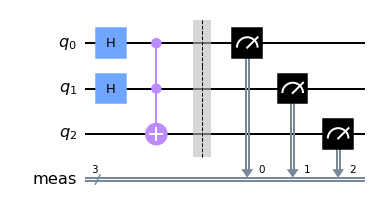

In [20]:
qc = QuantumCircuit(3)
qc.h([0,1])
qc.ccx(0,1,2)
qc.measure_all()
qc.draw()

In [21]:
from qiskit.tools import job_monitor
job  = execute(qc, lima)
job_monitor(job)

Job Status: job has successfully run


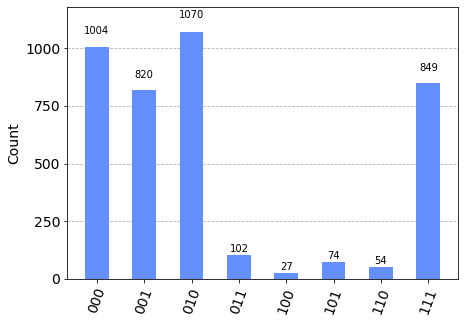

In [22]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [24]:
# Which of the code fragments, when inserted into the code below, will print the unitary shown in the output?
# Ans: q_gate = Operator([[-1/sqrt(2), 1/sqrt(2)],[1/sqrt(2), 1/sqrt(2)]])
# qc.append(q_gate,[0])
# q = Operator(qc)

from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator 
from math import sqrt

qc = QuantumCircuit(1)
# Insert your code
q_gate = Operator([[-1/sqrt(2), 1/sqrt(2)],[1/sqrt(2), 1/sqrt(2)]])
qc.append(q_gate,[0])
q = Operator(qc)
print(q)

Operator([[-0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j,  0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


In [249]:
# Which code fragment unrolls to unitary and cx gates during execution for QuantumCircuit qc and simulator sim?
# Ans: execute(qc,sim,basis_gates=['u','cx'])
from qiskit import QuantumCircuit, Aer, execute

qc  = QuantumCircuit(2)
sim = Aer.get_backend('aer_simulator')
job = execute(qc,sim,basis_gates=['u','cx'])

In [37]:
# Given the below code fragment, which of the following circuits is produced?
# Ans: look below

# 'OPENQASM 2.0;
# include "qelib1.inc";
# qreg q[4];
# creg c[3];
# x q[0];
# h q[1];
# ccx q[0],q[1],q[3];
# y q[3];
# z q[2];

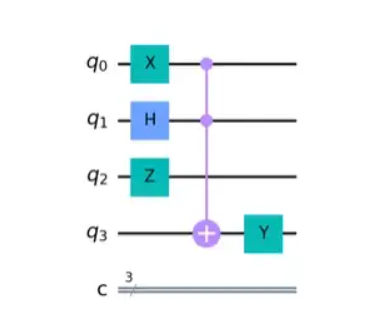

In [251]:
# Which three simulators are available in BasicAer?
# Ans: qasm_simualator, statevector_simulator, unitary_simualtor

from qiskit import BasicAer
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

### Question: Find the code (Ans: Given Below)
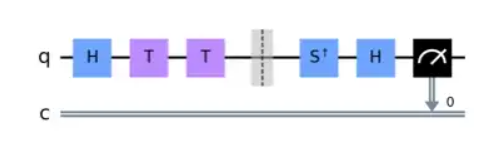

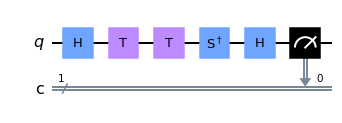

In [42]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.t(0)
qc.t(0)
qc.sdg(0)
qc.h(0)
qc.measure(0,0)
qc.draw()

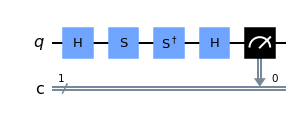

In [45]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.s(0)
qc.sdg(0)
qc.h(0)
qc.measure(0,0)
qc.draw()

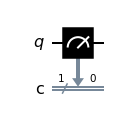

In [46]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)
qc.draw()

In [47]:
# Which simulator can be used to obtain the following output for the given circuit?
# Ans: statevector_simulator

qc = QuantumCircuit(2)
qc.h(0)
qc.z(1)

In [48]:
from qiskit import BasicAer , execute
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc,backend)
result = job.result().get_statevector()

In [49]:
print(result)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


### Which of the following code produces the following statevector?
 
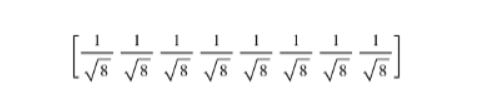

In [254]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_label('0000')
print(sv)
#Insert text here
sv_ev = sv.evolve(qc)
print(sv_ev)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2, 2, 2))


In [255]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.h(q)
print(qc)

sv_ev = sv.evolve(qc)
print(sv_ev)

       ┌───┐
q26_0: ┤ H ├
       ├───┤
q26_1: ┤ H ├
       ├───┤
q26_2: ┤ H ├
       └───┘
Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2, 2, 2))


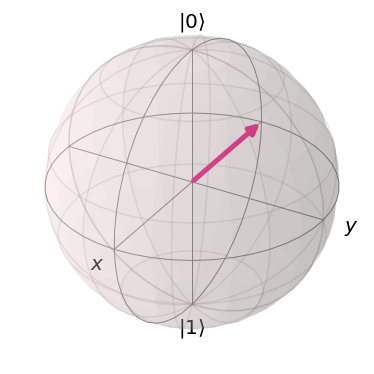

In [61]:
# Which of the below statevectors depict the below bloch sphere?

from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([-1,0,0],coord_type='cartesian')

### The state vector of the state  $ | - \rangle = 1/\sqrt2(|0 \rangle - |1 \rangle) $ will be $[1/\sqrt2 , -1/\sqrt2]$ 

## Which of the following code fragments produces the above circuit?
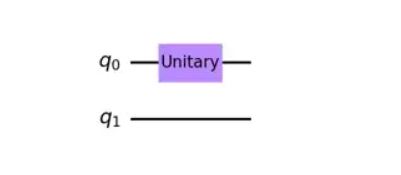

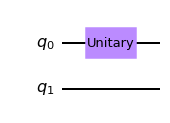

In [63]:
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
op = Operator([[0,1],[-1,0]])
qc.append(op,[0])
qc.draw()

### How many qubits does the qsphere represents?(Ans: 8)
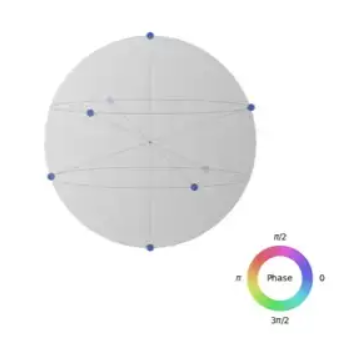

In [66]:
# How would you check information on connectivity?
# Ans: %qiskit_backend_overview
from qiskit import *
import qiskit.tools.jupyter
%qiskit_backend_overview

In [67]:
# Which of the following adds new classical bits to store measurements?
# Ans: measure_all()

In [69]:
# What will occur when the following code is executed?
# Ans: Shows an error
c = ClassicalRegister(2)
c.draw()

Traceback (most recent call last):
  Input In [69] in <cell line: 4>
    c.draw()
AttributeError: 'ClassicalRegister' object has no attribute 'draw'

Use %tb to get the full traceback.


In [88]:
# Which code snippet incorporates the given parameters?

# · Uses QASM simulator

# · Measures the circuit 5 times

# · Returns measurement bitstrings

# Ans: sim = Aer.get_backend('qasm_simulator')
# execute(qc,sim,memory=True,shots=5).result().get_memory()

qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

In [89]:
sim = Aer.get_backend('qasm_simulator')
execute(qc,sim,memory=True,shots=5).result().get_memory()

['1', '1', '1', '0', '1']

In [92]:
# What would be the result of the following code?
# Ans: {'1': 100}
from qiskit import Aer

qc = QuantumCircuit(1,1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.measure(0,0)
sim = Aer.get_backend('aer_simulator')
print(sim.run(qc, shots = 100).result().get_counts())

{'1': 100}


In [95]:
# Which of the following statevectors represent sv in the given below code fragment?
# Ans: [0,0,0,1,0,0,0]
from qiskit.quantum_info import Statevector

sv = Statevector.from_int(3,2**3)
print(sv)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [96]:
# Which two code fragments implement a CNOT gate between two quantum registers and measure the target?

# Ans:
# qc = QuantumCircuit(q1, q2, c)
# qc.cx(q1[0],q2[0])
# qc.measure(q2[0], c[0])
# qc.draw()

# qc = QuantumCircuit(q1, q2, c)
# qc.cx(q1, q2)
# qc.measure(q2[0], c[0])
# qc.draw()


q1 = QuantumRegister(1)
q2 = QuantumRegister(1)
c = ClassicalRegister(1)
#Insert code fragment here

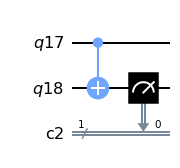

In [98]:
qc = QuantumCircuit(q1, q2, c)
qc.cx(q1[0],q2[0])
qc.measure(q2[0], c[0])
qc.draw()

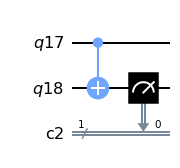

In [100]:
qc = QuantumCircuit(q1, q2, c)
qc.cx(q1, q2)
qc.measure(q2[0], c[0])
qc.draw()

### Ans: Ibmq_manilla (Actually the question is wrong...actually it's not a simulator it's a quantum computer)
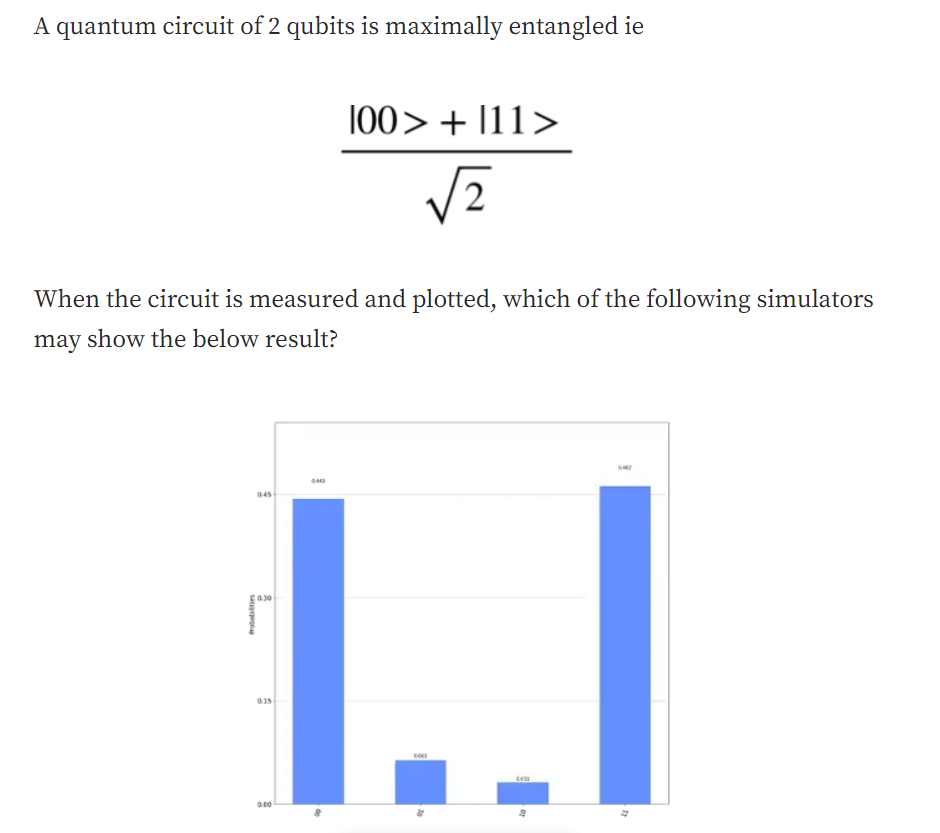

In [115]:
# What is the value of in_dim + out_dim?
# Ans: 8

from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import CRYGate
from math import pi

op = Operator(CRYGate(pi))
in_dim , out_dim = op.dim
print(in_dim + out_dim)

8


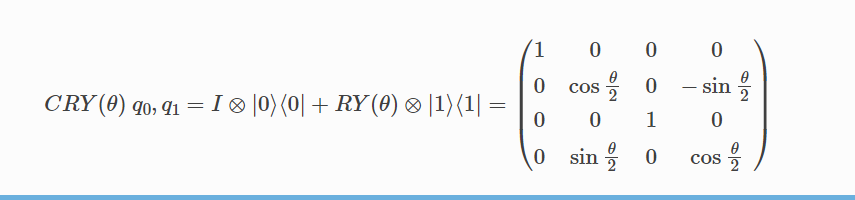

### Ans: CX gate with qubit 1 as control and qubit 0 as target
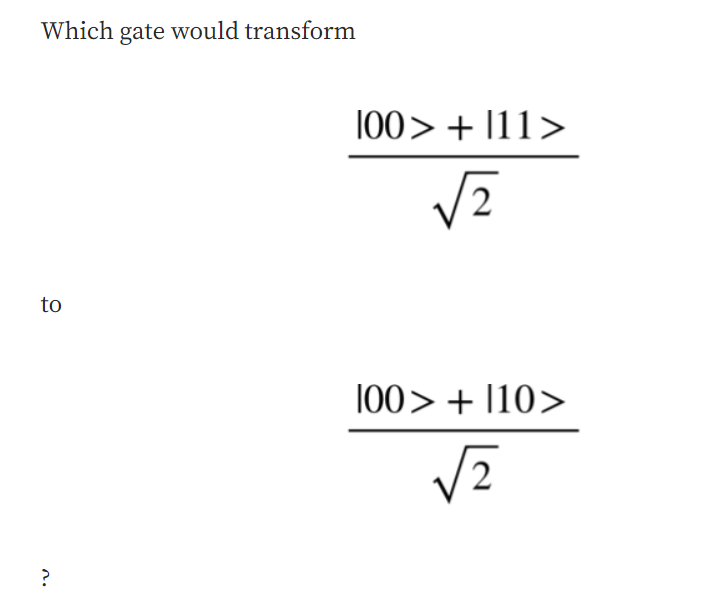

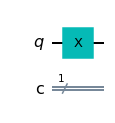

In [118]:
# Which of the following code fragments creates the above circuit?

from qiskit.circuit.library import XGate

qc = QuantumCircuit(1,1)
qc.append(XGate(),[0])
qc.draw()

# Which statevector represents q[1]
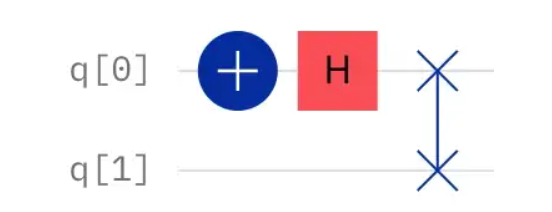

# Ans:  $|- \rangle$ so the statevector is $[\frac{1}{\sqrt2}, -\frac{1}{\sqrt2}]$

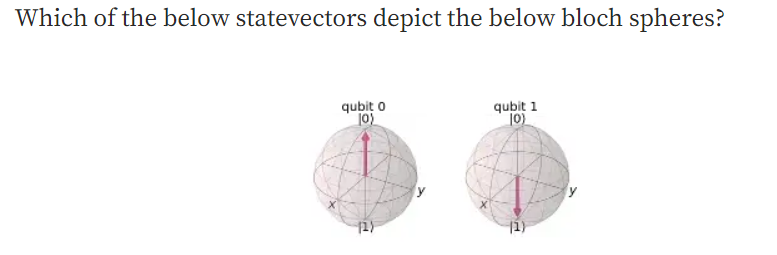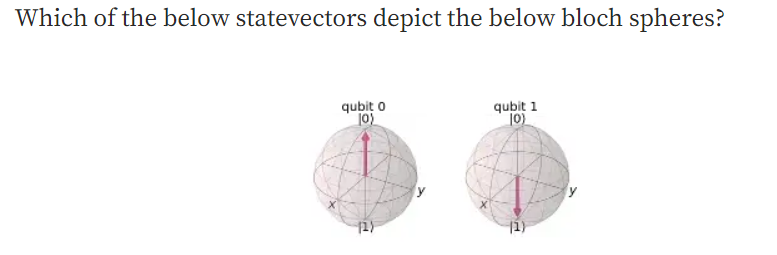

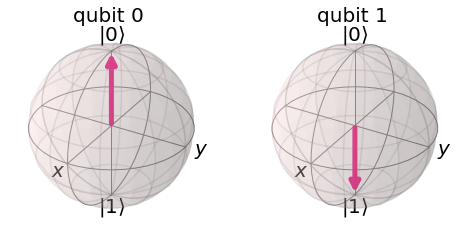

In [119]:
# Ans: Mainly here we will be using four statevector [0,0,1,0] which is for |01>
# Let's try to draw it with a multivector

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.i(0)
qc.x(1)

state = Statevector(qc)
plot_bloch_multivector(state)

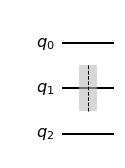

In [125]:
# Which of the following circuits would the below code produce?
# Ans: Given below

qc = QuantumCircuit(3)
qc.barrier(-2)
qc.draw('mpl')

In [126]:
# Which of the following constructs a quantum register with 7 qubits?
# Ans: QuantumRegister(7)

q = QuantumCircuit(7)
print(q)

     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6: 
     


In [128]:
p = QuantumRegister(7)
print(p)

QuantumRegister(7, 'q20')


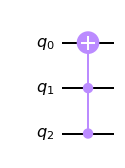

In [133]:
# Which of the two gates are the same?
# AnsL qc.mct([2,1],0) also qc.ccx(2,1,0)

qc = QuantumCircuit(3)
qc.mct([2,1],0)
qc.draw()

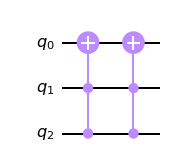

In [132]:
qc.ccx(2,1,0)
qc.draw()

In [134]:
# Which is the default output method used to draw the circuit?
# Ans: mpl

### Ans: 3 qubits
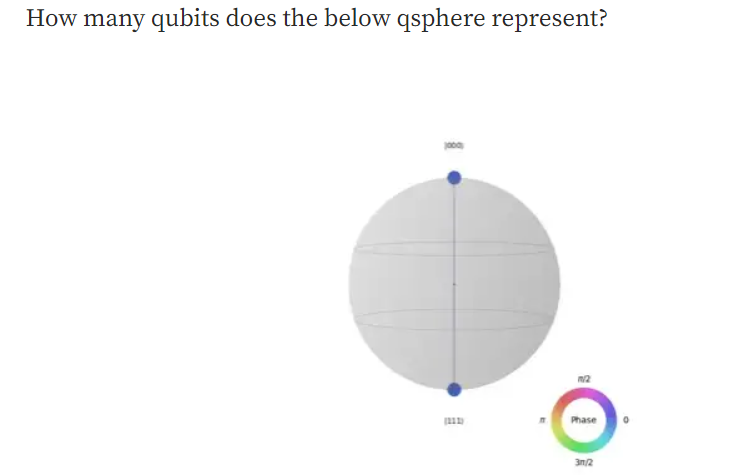

### Ans: Plot_bloch_vector([0,1,0])
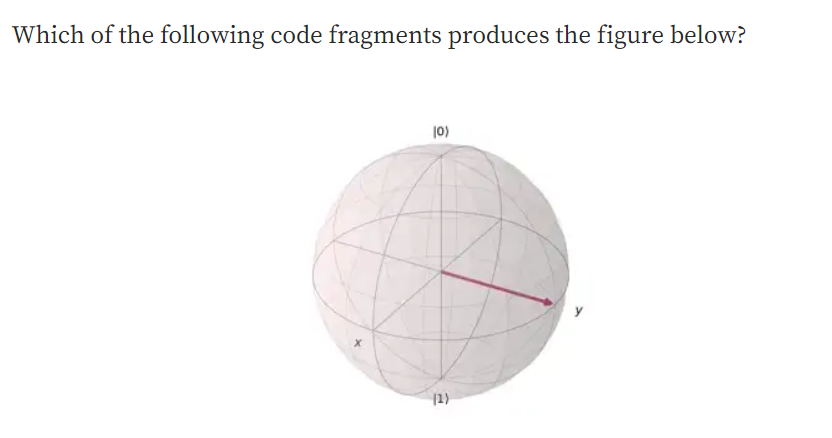

In [136]:
# What are the eigenstates of the X axis?
# Ans: |+>, |->

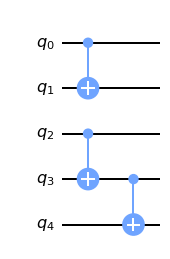

In [138]:
# What is the depth of the below circuit?
# Ans: 2 (explanation: minimum circuit layer) 
qc = QuantumCircuit(5)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(3,4)    
qc.draw()

In [140]:
qc.depth()

2

In [259]:
# Choose the code fragment(s) which produce(s) a Y gate with 3 controls

from qiskit.circuit.library.standard_gates import YGate


y_gate = YGate().control(3)


In [261]:
qc_y = QuantumCircuit(1)

qc_y.y(0)

y_gate = qc_y.to_gate().control(3)


In [162]:
# let's have an example 
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import HGate

qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
c3h_gate = HGate().control(2)
qc.append(c3h_gate, qr)
print(qc)


            
q23_0: ──■──
         │  
q23_1: ──■──
       ┌─┴─┐
q23_2: ┤ H ├
       └───┘


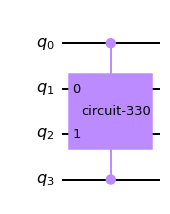

In [163]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import HGate

qc1 = QuantumCircuit(2)
qc1.x(0)
qc1.h(1)
custom = qc1.to_gate().control(2)

qc2 = QuantumCircuit(4)
qc2.append(custom, [0, 3, 1, 2])
qc2.draw()

In [164]:
# Which of the following code fragments creates a quantum circuit with 6 quantum bits and 3 classical bits?
# Ans: qc = QuantumCircuit(6, 3)

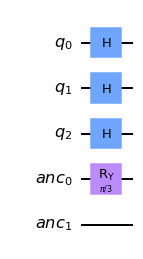

In [166]:
# Which of the following code fragments would produce the illustrated circuit?(Let's prodcuce the circuit)
q = QuantumRegister(3, name='q')
anc = QuantumRegister(2, name='anc')
qc = QuantumCircuit(q, anc)
qc.h(q[0:3])
qc.ry(pi/3,anc[0])
qc.draw()

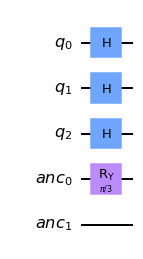

In [168]:
q = QuantumRegister(3, name='q')
anc = QuantumRegister(2, name='anc')
qc = QuantumCircuit(q, anc)
qc.h(q[0:3])
qc.ry(pi/3, 3)
qc.draw()

In [169]:
# T-gate is a Qiskit phase gate with what value of the phase parameter?
# Ans: π/4

In [170]:
# Given this code fragment, what is the probability that the measurement would result in 1?
# qc = QuantumCircuit(1)
# qc.rz(3 * math.pi/4, 0)
# Ans: 0

In [171]:
# Which two code fragments assign a qasm simulator to the variable sim?
# Ans: sim = BasicAer.get_backend(‘qasm_simulator’)
# Ans: sim = Aer.get_backend(‘qasm_simulator’)

In [172]:
# Which of the following multi-qubit gates rotates target qubit about the Z axis?
# Ans: CZ gate

### Ans: 5
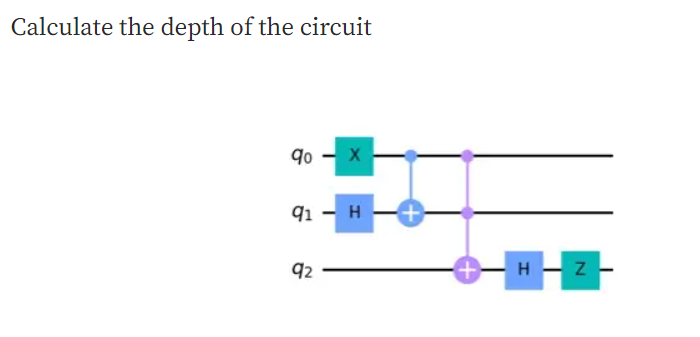

### Which of the following code fragments yields this circuit? (Select 3)
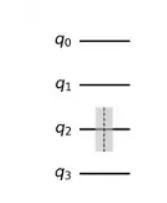

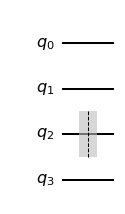

In [174]:
qc = QuantumCircuit(4)
qc.barrier([2])
qc.draw()

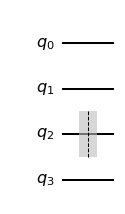

In [175]:
qc = QuantumCircuit(4)
qc.barrier([-2])
qc.draw()

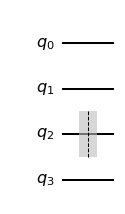

In [176]:
qc = QuantumCircuit(4)
qc.barrier(2)
qc.draw()

In [177]:
# Which of the following assigns a unitary simulator to the variable sim?
# Ans: sim = Aer.get_backend(‘unitary_simulator’)

In [178]:
# Which of the following simulators is used to obtain the unitary of a circuit?
# Ans: unitary_simulator

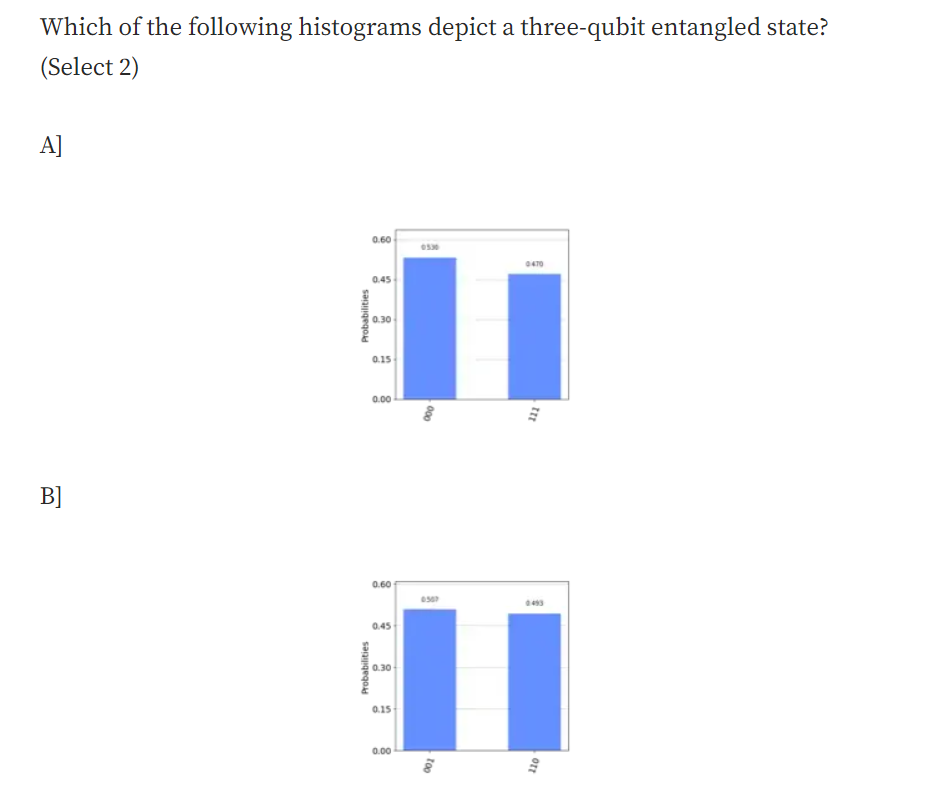

In [179]:
# What is the process fidelity for gates differing only by global phase?
# Ans: 1

It might be worth mentioning the physical motivation for these definitions and the concept of fidelity itself.

Unlike the classical computers we all know and love, quantum computers are fundamentally analog machines. what that means practically is that the gates you apply when you run code on a real quantum computer are going to be parameterized by a real variable. For example, in superconducting qubits, applying a single-qubit gate means driving your qubit with a (typically microwave-range) pulse from an arbitrary waveform generator. The amplitude, frequency, and time-duration of that pulse are all real-valued parameters, and as such they're all subject to some amount of error. These so-called 'unitary' errors are a separate issue from the errors that result from your qubit interacting with the environment. You've applied a real quantum gate, and prepared a real, coherent quantum state, but neither the gate nor the state are ever going to be exactly the ones you intended.

That's where measures of fidelity come in, as a way of keeping track of just how close you can expect to come on your actual, physical quantum computer to the circuits you are producing in code.

In a way, fidelity forms the essential link between the neat digital niceties of your high level implementation and the messy realities of the quantum hardware itself.

That, at least, is how I understand it. I'd welcome any corrections.

The following video gives some more specific examples of the same idea https://www.youtube.com/watch?v=MtD1Z8MMrgY, while this article gives a pretty friendly, historically motivated explanation of the math involved.

In [192]:
# Which of the following will print 1.0? (Select 2)

from qiskit.quantum_info import average_gate_fidelity
from cmath import exp

gate1 = Operator(XGate())
gate2 = exp(-1j / 2) * gate1
print(average_gate_fidelity(gate1, gate2))

1.0


In [188]:
from qiskit.quantum_info import state_fidelity

print(state_fidelity([0,1],[0,1j]))

1.0


In [206]:
# What would be the state fidelity of the statevectors of the below circuits?
# Ans: 0

from qiskit.quantum_info import state_fidelity, Statevector

qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)
qc1.x(0)
qc2.z(0)
state1 = Statevector(qc1)
state2 = Statevector(qc2)
print(state1)
print(state2)
print(state_fidelity([0,1],[1,0]))

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
0.0


In [207]:
# Which of the following measures the 6th qubit in the 5th cbit?
# Ans:  qc.measure(5,4)

In [208]:
# What would be the OpenQASM string of a circuit with 1 qubit and 1 cbit in superposition?

# Ans:

# OPENQASM 2.0;
# include “qelib1.inc”;
# qreg q[1];
# creg c[1];
# h q[0];

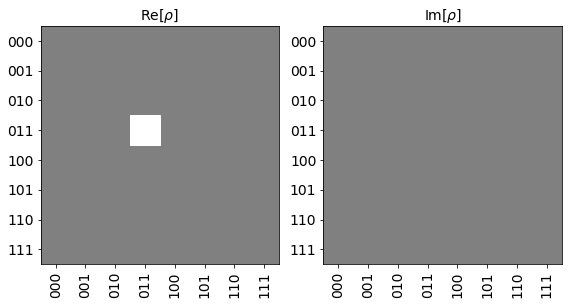

In [211]:
# For statevector sv, how can the hinton plot for the state be produced? (Select 2)
# Ans: Given below

sv.draw('hinton')

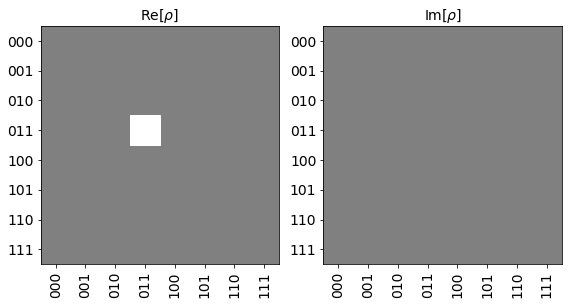

In [213]:
from qiskit.visualization import plot_state_hinton

plot_state_hinton(sv)

# 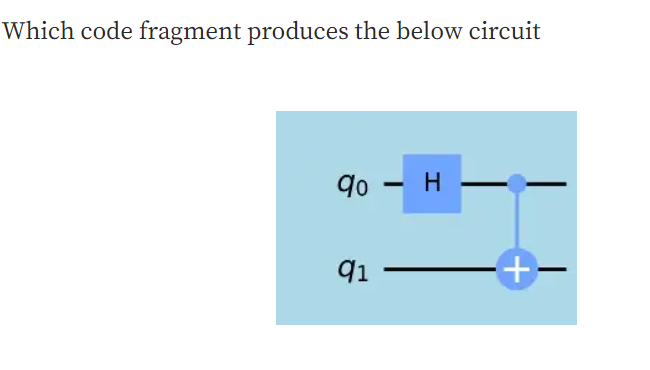

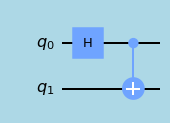

In [215]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
# Insert the text here
qc.draw('mpl', style={'backgroundcolor':'lightblue'})

ibmqfactory.load_account:WARNING:2022-12-18 23:33:31,710: Credentials are already in use. The existing account in the session will be replaced.


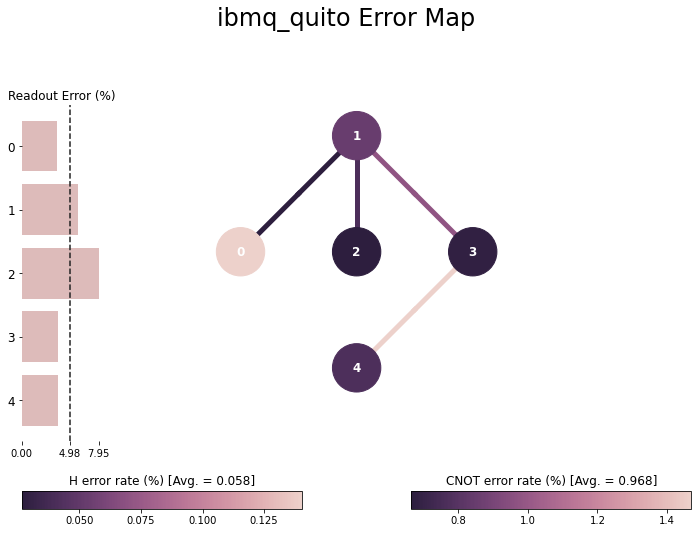

In [220]:
# Which of the following shows a figure that depicts readout error of ibmq quito?
# Ans: given below
from qiskit.visualization import plot_error_map, plot_gate_map
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
plot_error_map(backend)

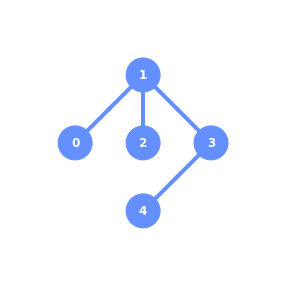

In [221]:
plot_gate_map(backend)

In [222]:
# Which of the following fragment(s) show the gate map of the device?
# Ans: plot_gate_map and plot_error_map 

In [262]:
# Which parameter does not display the barriers of the circuit?

plot_barrier = False in qiskit.circuit.QuantumCircuit

Traceback (most recent call last):
  Input In [262] in <cell line: 3>
    plot_barrier = False in qiskit.circuit.QuantumCircuit.draw
TypeError: argument of type 'function' is not iterable

Use %tb to get the full traceback.


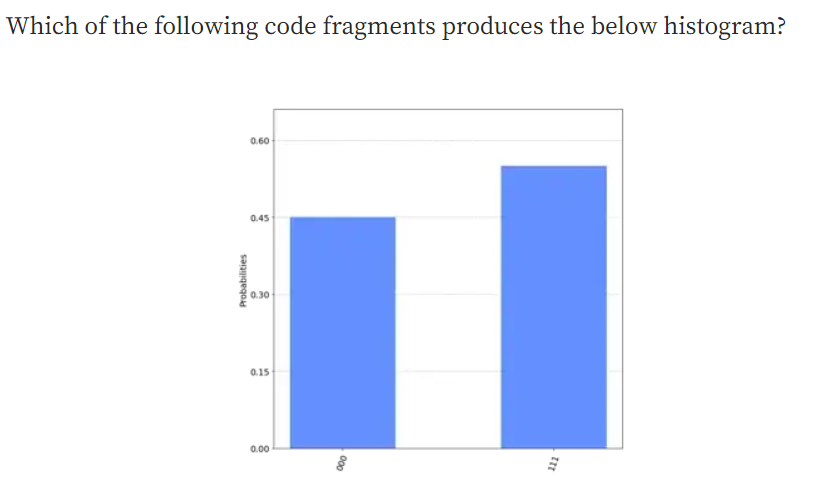

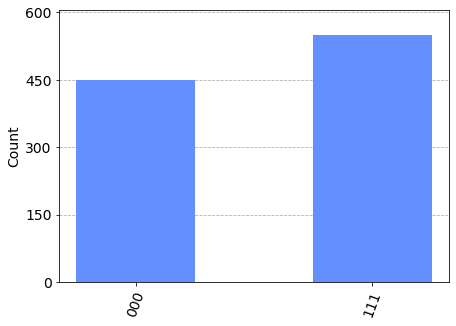

In [231]:
plot_histogram({'000':450, '111': 550}, bar_labels=False)

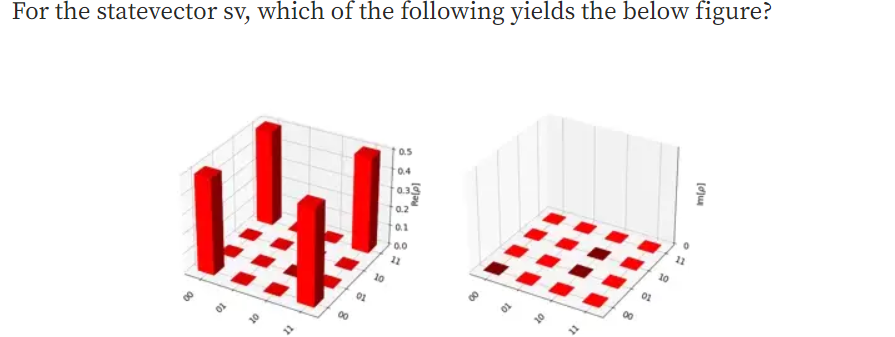


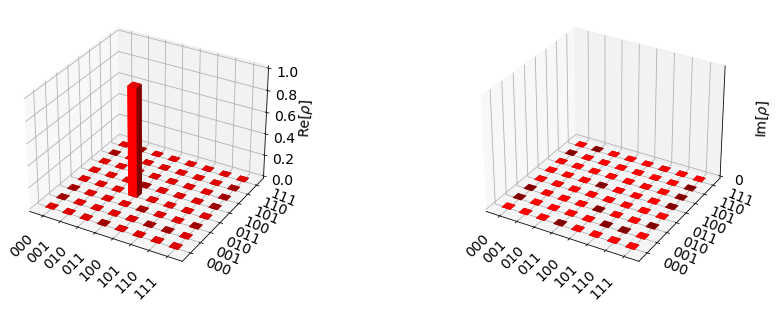

In [234]:
from qiskit.visualization import plot_state_city
plot_state_city(sv,color=['red','red'])

In [239]:
# Re-arrange the following to produce a circuit which can be represented by the given statevector
qc = QuantumCircuit(3)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
state = Statevector(qc)
print(state)

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j, -0.70710678+0.j],
            dims=(2, 2, 2))


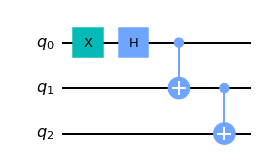

In [240]:
qc.draw()

┌──────────┐┌─┐
q: ┤ Ry(3π/4) ├┤M├
   └──────────┘└╥┘
c: ═════════════╩═

{'0': 144, '1': 880}
